In [146]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd

In [147]:
vmin = 0
#vmax = 0.5
vmax = 10

In [148]:
sf = "/Users/apple/Desktop/Others/Python_Codes/GEMS_training/For PHILSA GEMS Training Distribution/SHP/provinces.shp"

# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"

world = gpd.read_file(sf)
world = world.set_crs(crs=crs)

ct = gpd.read_file("/Users/apple/Desktop/Others/Python_Codes/GEMS_training/For PHILSA GEMS Training Distribution/SHP/provinces.shp")
ct = ct.reset_index()

mnl_shp = ct[ct['PROVINCE'].str.contains("Metropolitan Manila")]
mnl_shp = mnl_shp.set_crs(crs=crs)

In [127]:
fp = r'Metro_Manila/Metro_Manila_0317_0515_2019'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2019 = df

fp = r'Metro_Manila/Metro_Manila_0317_0515_2020'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2020 = df

fp = r'Metro_Manila/Metro_Manila_0317_0515_2021'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2021 = df

In [128]:
df_2021

,Unnamed: 0,y,x,val,lat,lon,geometry
0,0,14.781778,121.052476,2.043332,14.781778,121.052476,POINT (121.052 14.782)
1,1,14.781778,121.061459,1.895112,14.781778,121.061459,POINT (121.061 14.782)
2,2,14.772795,121.043493,2.432058,14.772795,121.043493,POINT (121.043 14.773)
3,3,14.772795,121.052476,2.034664,14.772795,121.052476,POINT (121.052 14.773)
4,4,14.772795,121.061459,1.942323,14.772795,121.061459,POINT (121.061 14.773)
...,...,...,...,...,...,...,...
671,671,14.359570,121.016544,1.651819,14.359570,121.016544,POINT (121.017 14.360)
672,672,14.359570,121.025527,1.625137,14.359570,121.025527,POINT (121.026 14.360)
673,673,14.359570,121.034510,1.589117,14.359570,121.034510,POINT (121.035 14.360)
674,674,14.350587,121.007560,1.631048,14.350587,121.007560,POINT (121.008 14.351)


In [129]:
#mnl_shp.to_file('Metro_Manila_prep_smav.shp')  

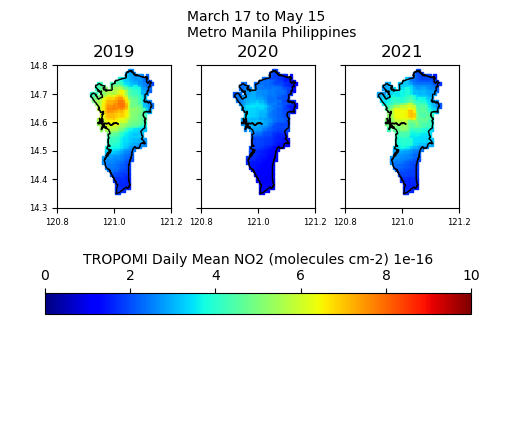

In [132]:
vmax = 10
xl = 120.8
xu = 121.2
yl = 14.3
yu = 14.8
markersize = 3
#fig, ax = plt.subplots()
fig = plt.figure()
gs = fig.add_gridspec(2, 3,hspace=0.6,wspace=-0.31)
ax= fig.add_subplot(gs[0,0])
df_2019.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

mnl_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
plt.ylim(yl, yu)
plt.xlim(xl, xu)

plt.title(f'2019') 
############################
ax= fig.add_subplot(gs[0,1])
df_2020.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)
#cax = fig.add_axes([0.6, 0.6, 0.25, 0.03])
#cb = fig.colorbar(cbar, ax=cax, orientation='horizontal')
#fig.colorbar(cbar, ax=ax, orientation="horizontal",  pad=0.1, label=r'Daily Mean NO2 (molecules cm-2) 1e-16',)
mnl_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
plt.ylim(yl, yu)
plt.xlim(xl, xu)
plt.text(120.75, 14.9, 'March 17 to May 15 \nMetro Manila Philippines', fontsize=10)
plt.title(f'2020') 
##############################
ax= fig.add_subplot(gs[0,2])
df_2021.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

mnl_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
plt.ylim(yl, yu)
plt.xlim(xl, xu)
plt.title(f'2021') 
ax= fig.add_subplot(gs[1,0:3])
ax.axis('off')
fig.colorbar(cbar, ax=ax, orientation="horizontal",  location ='top', label=r'TROPOMI Daily Mean NO2 (molecules cm-2) 1e-16',)


#plt.title(f'Daily Mean NO2 for 03-17 to 05-15 2019')    
plt.savefig(f'TROPOMI_NO2_2019_2021.jpg', dpi=300,  facecolor='white', bbox_inches="tight")

In [149]:
loc = 'Pampanga'

fp = f'{loc}/{loc}_0317_0515_2019'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2019 = df

fp = f'{loc}/{loc}_0317_0515_2020'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2020 = df

fp = f'{loc}/{loc}_0317_0515_2021'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2021 = df

In [151]:
pam_shp = ct[ct['PROVINCE'].str.contains("Pampanga")]
pam_shp = pam_shp.set_crs(crs=crs)
pam_shp

,index,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
59,59,177,PHL,Philippines,60,Pampanga,NaN,NaN,Lalawigan|Probinsya,Province,Pampanga,Central Luzon (Region III),"MULTIPOLYGON (((120.617 14.800, 120.616 14.800..."


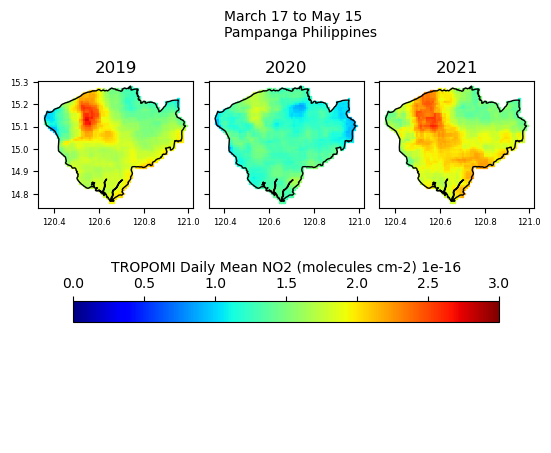

In [156]:
vmax = 3
#xl = 120.8
#xu = 121.2
#yl = 14.3
#yu = 14.8
yu_ = 15.5
markersize = 1
#fig, ax = plt.subplots()
fig = plt.figure()
gs = fig.add_gridspec(2, 3,hspace=0.6,wspace=0.1)
ax= fig.add_subplot(gs[0,0])
df_2019.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

pam_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
#plt.ylim(yl, yu)
#plt.xlim(xl, xu)

plt.title(f'2019') 
############################
ax= fig.add_subplot(gs[0,1])
df_2020.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)
#cax = fig.add_axes([0.6, 0.6, 0.25, 0.03])
#cb = fig.colorbar(cbar, ax=cax, orientation='horizontal')
#fig.colorbar(cbar, ax=ax, orientation="horizontal", pad=0.1,  label=r'Daily Mean NO2 (molecules cm-2) 1e-16',)
pam_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
#plt.ylim(yl, yu)
#plt.xlim(xl, xu)
plt.text(120.4, yu_, 'March 17 to May 15 \nPampanga Philippines', fontsize=10)
plt.title(f'2020') 
##############################
ax= fig.add_subplot(gs[0,2])
df_2021.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

pam_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
#plt.ylim(yl, yu)
#plt.xlim(xl, xu)
plt.title(f'2021') 
ax= fig.add_subplot(gs[1,0:3])
ax.axis('off')
fig.colorbar(cbar, ax=ax, orientation="horizontal",  location ='top', label=r'TROPOMI Daily Mean NO2 (molecules cm-2) 1e-16',)


#plt.title(f'Daily Mean NO2 for 03-17 to 05-15 2019')    
plt.savefig(f'TROPOMI_NO2_2019_2021_Pampanga.jpg', dpi=300,  facecolor='white', bbox_inches="tight")

In [65]:

cebu_shp = ct[ct['PROVINCE'].str.contains("Cebu")]
cebu_shp = cebu_shp.set_crs(crs=crs)
cebu_shp

,index,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
24,24,177,PHL,Philippines,25,Cebu,NaN,NaN,Lalawigan|Probinsya,Province,Cebu,Central Visayas (Region VII),"MULTIPOLYGON (((123.390 9.435, 123.390 9.435, ..."


In [134]:
loc = 'Cebu'

fp = f'{loc}/{loc}_0317_0515_2019'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2019 = df

fp = f'{loc}/{loc}_0317_0515_2020'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2020 = df

fp = f'{loc}/{loc}_0317_0515_2021'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2021 = df

In [135]:
df_2021

,Unnamed: 0,y,x,val,lat,lon,geometry
0,0,11.583776,124.043866,0.607434,11.583776,124.043866,POINT (124.044 11.584)
1,1,11.574792,124.043866,0.570979,11.574792,124.043866,POINT (124.044 11.575)
2,2,11.520894,124.088782,0.665006,11.520894,124.088782,POINT (124.089 11.521)
3,3,11.520894,124.097765,0.595529,11.520894,124.097765,POINT (124.098 11.521)
4,4,11.520894,124.106748,0.615575,11.520894,124.106748,POINT (124.107 11.521)
...,...,...,...,...,...,...,...
5559,5559,9.418836,123.343180,0.220246,9.418836,123.343180,POINT (123.343 9.419)
5560,5560,9.418836,123.352163,0.239423,9.418836,123.352163,POINT (123.352 9.419)
5561,5561,9.409853,123.316231,0.243487,9.409853,123.316231,POINT (123.316 9.410)
5562,5562,9.409853,123.325214,0.255532,9.409853,123.325214,POINT (123.325 9.410)


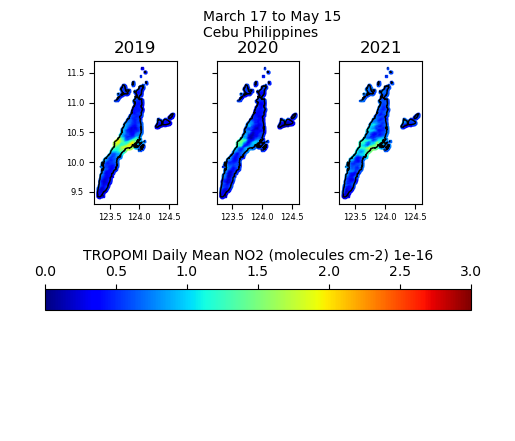

In [137]:
vmax = 3
#xl = 120.8
#xu = 121.2
#yl = 14.3
#yu = 14.8
yu_ = 12.1
markersize = 1
#fig, ax = plt.subplots()
fig = plt.figure()
gs = fig.add_gridspec(2, 3,hspace=0.6,wspace=-0.51)
ax= fig.add_subplot(gs[0,0])
df_2019.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

cebu_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
#plt.ylim(yl, yu)
#plt.xlim(xl, xu)

plt.title(f'2019') 
############################
ax= fig.add_subplot(gs[0,1])
df_2020.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)
#cax = fig.add_axes([0.6, 0.6, 0.25, 0.03])
#cb = fig.colorbar(cbar, ax=cax, orientation='horizontal')
#fig.colorbar(cbar, ax=ax, orientation="horizontal", pad=0.1,  label=r'Daily Mean NO2 (molecules cm-2) 1e-16',)
cebu_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
#plt.ylim(yl, yu)
#plt.xlim(xl, xu)
plt.text(123., yu_, 'March 17 to May 15 \nCebu Philippines', fontsize=10)
plt.title(f'2020') 
##############################
ax= fig.add_subplot(gs[0,2])
df_2021.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

cebu_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
#plt.ylim(yl, yu)
#plt.xlim(xl, xu)
plt.title(f'2021') 
ax= fig.add_subplot(gs[1,0:3])
ax.axis('off')
fig.colorbar(cbar, ax=ax, orientation="horizontal",  location ='top', label=r'TROPOMI Daily Mean NO2 (molecules cm-2) 1e-16',)


#plt.title(f'Daily Mean NO2 for 03-17 to 05-15 2019')    
plt.savefig(f'TROPOMI_NO2_2019_2021_Cebu.jpg', dpi=300,  facecolor='white', bbox_inches="tight")